# I.Milestone: Data Discovery and preprocessing steps

#TODO bevezető szöveg, nagy chart a dataflowról

## Installs and import

In [ ]:
!pip install -r requirements.txt

In [1]:
import pandas as pd
import os
from typing import List

from Participant import Participant
from NWBData import NWBData
from PreProcessedData import PreProcessedData
import glob
import zipfile
#from create_dataloaders import create_dataloaders

## 1. Original dataset

#TODO: írni az eredeti dataszetről 

In [9]:
# unzipping dataset
zip_file = glob.glob('./*.zip')[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')

### Loading participant info

In [2]:
DEFAULT_PATH_BIDS = r'./SingleWordProductionDutch-iBIDS'
DEFAULT_FEATURES_PATH = r'./features'
pd_participants = pd.read_csv(os.path.join(DEFAULT_PATH_BIDS,'participants.tsv'), delimiter='\t')

In [3]:
participants = [Participant(pd_participants.iloc[p_idx],p_idx) for p_idx in range(pd_participants.shape[0])]

In [4]:
p_ids = [p.get_model().participant_id for p in participants]

In [5]:
print(p_ids)

['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10']


In [6]:
for p in participants:
    print(p.get_model())

p_idx=0 participant_id='sub-01' age=20 sex=<SexEnum.FEMALE: 'Female'> hand=nan
p_idx=1 participant_id='sub-02' age=43 sex=<SexEnum.MALE: 'Male'> hand=nan
p_idx=2 participant_id='sub-03' age=24 sex=<SexEnum.MALE: 'Male'> hand=nan
p_idx=3 participant_id='sub-04' age=46 sex=<SexEnum.FEMALE: 'Female'> hand=nan
p_idx=4 participant_id='sub-05' age=50 sex=<SexEnum.FEMALE: 'Female'> hand=nan
p_idx=5 participant_id='sub-06' age=16 sex=<SexEnum.MALE: 'Male'> hand=nan
p_idx=6 participant_id='sub-07' age=47 sex=<SexEnum.MALE: 'Male'> hand=nan
p_idx=7 participant_id='sub-08' age=22 sex=<SexEnum.FEMALE: 'Female'> hand=nan
p_idx=8 participant_id='sub-09' age=20 sex=<SexEnum.FEMALE: 'Female'> hand=nan
p_idx=9 participant_id='sub-10' age=36 sex=<SexEnum.MALE: 'Male'> hand=nan


#TODO: szöveg mi állapítható meg a résztvevőkről?

### Loading NWBData

In [10]:
nwb_datas: List[NWBData] = []

for participant in participants:
    participant_id = participant.get_model().participant_id
    nwb_datas.append(NWBData(participant_id,path_bids=DEFAULT_PATH_BIDS))

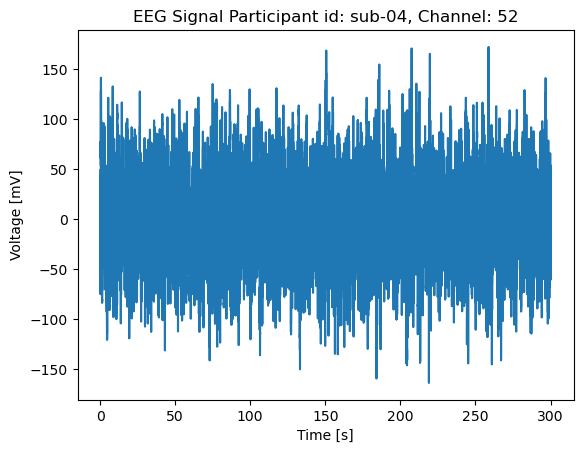

In [11]:
nwb_datas[3].display_eeg_signal(52)

## 2. Extracting features

#TODO: ábra a feature_extraction data_flow-járól

In [18]:
!python SingleWordProductionDutch/extract_features.py

C:\git\BRAIN2SPEECH_LesssGoo\SingleWordProductionDutch\extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
C:\git\BRAIN2SPEECH_LesssGoo\SingleWordProductionDutch\extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
C:\git\BRAIN2SPEECH_LesssGoo\SingleWordProductionDutch\extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
C:\git\BRAIN2SPEECH_LesssGoo\SingleWordProductionDutch\extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
C:\git\B

#### Hilbert transform demo
from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

def hilbert_demo():
    duration = 1.0
    fs = 400.0
    samples = int(fs*duration)
    t = np.arange(samples) / fs
    
    signal = chirp(t, 20.0, t[-1], 100.0)
    signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )
    
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) /
                               (2.0*np.pi) * fs)
    
    fig, (ax0, ax1) = plt.subplots(nrows=2)
    ax0.plot(t, signal, label='signal')
    ax0.plot(t, amplitude_envelope, label='envelope')
    ax0.set_xlabel("time in seconds")
    ax0.legend()
    ax1.plot(t[1:], instantaneous_frequency)
    ax1.set_xlabel("time in seconds")
    ax1.set_ylim(0.0, 120.0)
    fig.tight_layout()

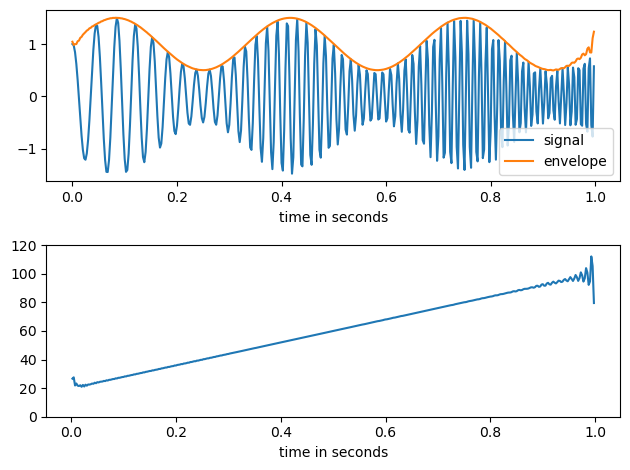

In [12]:
hilbert_demo()

### 3. Creating DataLoaders

In [12]:
preprocessed_ds = []
for p_id in p_ids:
    preprocessed_ds.append(PreProcessedData(p_id,DEFAULT_FEATURES_PATH))

In [24]:
for pre_ds in preprocessed_ds:
    model = pre_ds.get_model()
    print(f"Participant: {model.p_id}")
    print(f"Feature shape: {model.features.shape}")
    print(f"Spectogram shape: {model.spectogram.shape}")
    print()

Participant: sub-01
Feature shape: (29985, 1143)
Spectogram shape: (29985, 23)

Participant: sub-02
Feature shape: (29985, 1143)
Spectogram shape: (29985, 23)

Participant: sub-03
Feature shape: (29986, 1143)
Spectogram shape: (29986, 23)

Participant: sub-04
Feature shape: (29986, 1035)
Spectogram shape: (29986, 23)

Participant: sub-05
Feature shape: (29984, 540)
Spectogram shape: (29984, 23)

Participant: sub-06
Feature shape: (29993, 1143)
Spectogram shape: (29993, 23)

Participant: sub-07
Feature shape: (29991, 1143)
Spectogram shape: (29991, 23)

Participant: sub-08
Feature shape: (29992, 486)
Spectogram shape: (29992, 23)

Participant: sub-09
Feature shape: (29993, 1053)
Spectogram shape: (29993, 23)

Participant: sub-10
Feature shape: (28460, 1098)
Spectogram shape: (28460, 23)



Dimensions doesn't match!

In [20]:
#create_dataloaders(preprocessed_ds)